## Stage 3: Data Exploration

### 1. Objective
In this stage, we're going to visualize how is the data store in the csv file and decide what of the data can be useful for the task. This will help us decide how to proceed in the subsequences stages.

### 2. Approach
We use pandas library to read the csv. It offers and easy way to explore the data and is powerful for data cleaning and preprocessing. 

### 3. Implementation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [28]:
# Load dataset
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, '..', 'data/raw', 'close.csv')
data_raw = pd.read_csv(dataset_path, low_memory=False)

In [4]:
# Basic statistics
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75866 entries, 0 to 75865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Aviso          75866 non-null  object
 1   Fecha Aviso    75866 non-null  object
 2   Observaciones  75866 non-null  object
 3   Área           75866 non-null  object
 4   Especialidad   75866 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


In [29]:
data_raw.head()

,Aviso,Fecha Aviso,Observaciones,Área,Especialidad
0,2025/007696,2025-07-18,ALMACEN,10367P00Z00H009 - ALMACEN MATERIAL,19 - APOYO NO ESPECIALIZADO
1,2025/007694,2025-07-18,DOCUMENTACIÓN Y COLOCACIÓN DE SOPORTES,10127S02Z00H030 - ELECTROMEDICINA /EMPRESA EXT...,12 - ELECTROMEDICINA
2,2025/007691,2025-07-18,BUENAS TARDES. EN LA HABITACIO 608 HACE MUCHO ...,10128P06Z0BH015 - HABITACIÓN 608,3 - CALEFACCIÓN Y CLIMATIZACIÓN
3,2025/007690,2025-07-18,ATENDER ALMACEN DE MANTENIMIENTO,10367P00Z00H009 - ALMACEN MATERIAL,19 - APOYO NO ESPECIALIZADO
4,2025/007689,2025-07-18,BUENAS TARDES.\r\nSOLICITO LA SUSTITUCIÓN DE 3...,10128P07Z0BH019 - INSTALACIONES,8 - MECANICA


We got a total of 75866 entries in our dataset. From the columns we can distinct five different field. The fields 'Aviso' (ticket id) and 'Fecha' (date) don't offer a relevant information for the approach of this project. In the other hand, 'Area' can be determinant in the process of labeling, but that can be addressed in future versions. The fields I'm really interested for this project are 'Observaciones' (Main text) and 'Especialidad' (category). Lets deep more into those.

In [5]:
# First few rows of the dataset
data_raw[['Observaciones', 'Especialidad']].head()

,Observaciones,Especialidad
0,ALMACEN,19 - APOYO NO ESPECIALIZADO
1,DOCUMENTACIÓN Y COLOCACIÓN DE SOPORTES,12 - ELECTROMEDICINA
2,BUENAS TARDES. EN LA HABITACIO 608 HACE MUCHO ...,3 - CALEFACCIÓN Y CLIMATIZACIÓN
3,ATENDER ALMACEN DE MANTENIMIENTO,19 - APOYO NO ESPECIALIZADO
4,BUENAS TARDES.\r\nSOLICITO LA SUSTITUCIÓN DE 3...,8 - MECANICA


In [6]:
# Basic statistics of categories
data_raw.value_counts('Especialidad',dropna=False)

Especialidad
8 - MECANICA                       24477
1 - ELECTRICIDAD                   16674
12 - ELECTROMEDICINA                9048
5 - FONTANERIA                      8910
4 - CARPINTERIA                     5318
3 - CALEFACCIÓN Y CLIMATIZACIÓN     3801
19 - APOYO NO ESPECIALIZADO         3089
7 - ALBAÑILERIA                     1704
17 - VARIAS ESPECIALIDADES          1140
6 - PINTURA Y REVESTIMIENTOS         891
13 - RED DE VOZ Y DATOS              379
16 - OFICINA TÉCNICA                 178
11 - ELECTRO-MECANICA                113
2 - OTROS SERVICIOS GENERALES         86
10 - TAPICERIA                        50
14 - LIMPIEZA                          4
18 - DDD                               3
9 - JARDINERIA                         1
Name: count, dtype: int64

There are 18 different categories and '8 - MECANICA' is the most frequent value with a big margin. We'll see if this over representation affects the training and how to avoid it. There's no empty field in 'Especialidad'.

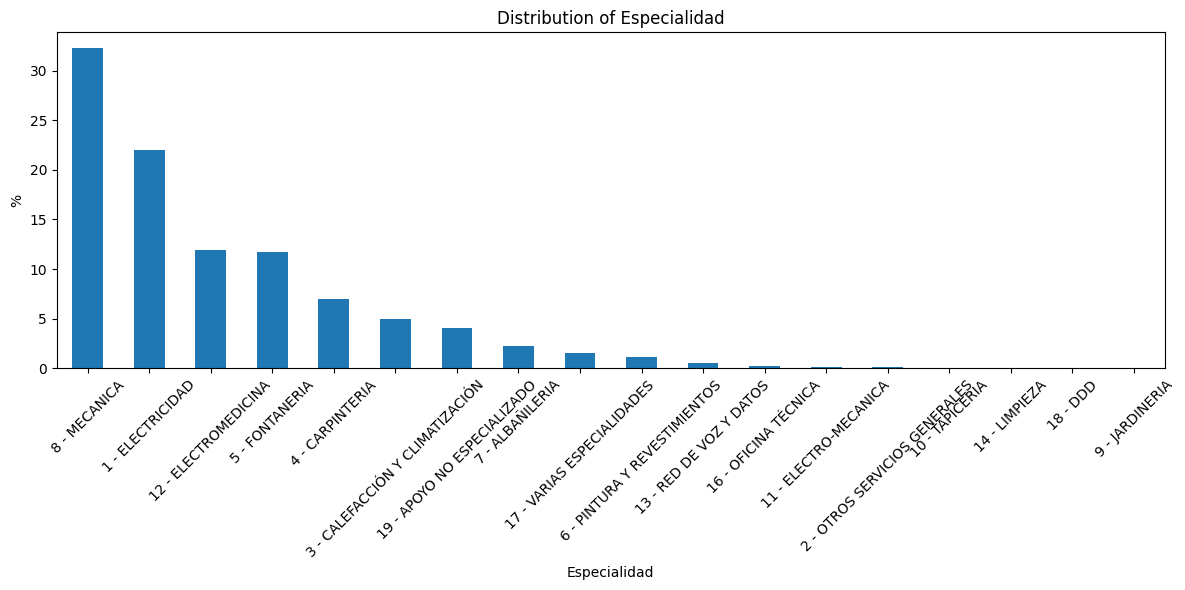

In [7]:
# Plotting the distribution of 'Especialidad'
plt.figure(figsize=(12, 6))
data_raw['Especialidad'].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title('Distribution of Especialidad')
plt.xlabel('Especialidad')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More than 30% of the entries correspond to '8-MECANICA', followed by '1-ELECTRICIDAD' with arround 22%.

In [8]:
# First few rows of the Observaciones field
print('Examples of Observaciones field:')
print(data_raw.Observaciones[5])
print(data_raw.Observaciones[40])
print('Empty fields in Observaciones =',data_raw.Observaciones.isnull().sum())

Examples of Observaciones field:
ARREGLAR PUERTA LAVADORA NUMERO 2
BANDEJA DE PIECERO DE LA CAMA EN HABITACION 716 NO FUNCIONA.
Empty fields in Observaciones = 0


In [24]:
# Basic statistics
data_raw['text_length'] = data_raw['Observaciones'].str.len()
data_raw['word_count'] = data_raw['Observaciones'].str.split().str.len()

print(f"Total entries: {len(data_raw)}")
print(f"Average text length: {data_raw['text_length'].mean():.1f} characters")
print(f"Average word count: {data_raw['word_count'].mean():.1f} words")
print(f"Min word count: {data_raw['word_count'].min()} words")
print(f"Max word count: {data_raw['word_count'].max()} words")
print(f"Unique texts: {data_raw['Observaciones'].nunique()}")

Total entries: 75866
Average text length: 69.8 characters
Average word count: 11.5 words
Min word count: 1 words
Max word count: 204 words
Unique texts: 65837


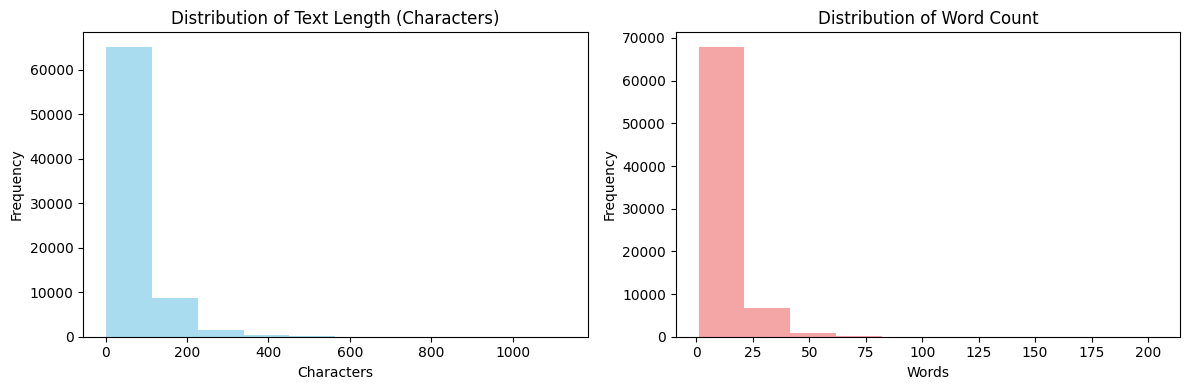

In [25]:
# Text length distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data_raw['text_length'], bins=10, alpha=0.7, color='skyblue')
plt.title('Distribution of Text Length (Characters)')
plt.xlabel('Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_raw['word_count'], bins=10, alpha=0.7, color='lightcoral')
plt.title('Distribution of Word Count')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

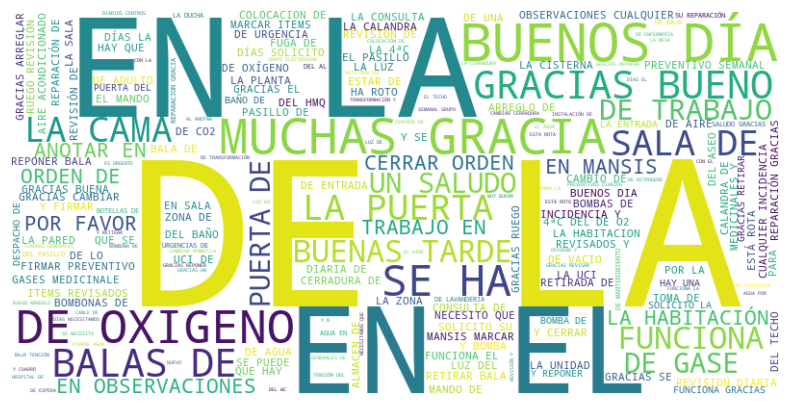

In [26]:
# Create word cloud
text_for_cloud = ' '.join(data_raw['Observaciones'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_cloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4. Results
We found a clean dataset with no null or NaN values, so in the data preprocess won't be necessary to remove any entry because of this reason. We got a total of 75866 entries, what I think it's enough to train the system. There is a total of 18 difference categories, witch will represent 18 different labels in the outputs of the RNN. There is a strong appearance of some of the labels, and in particular label '8-MECANICA', what can induce some problems in the training (class imbalance). Finally we represented some text distribution and a word cloud to visualize the most common words.

### 5. Challenges

- **Class imbalance:** Some categories are overrepresented, which may bias the model.
- **Text quality:** The 'Observaciones' field may contain typos, abbreviations, or inconsistent language.
- **Ambiguous categories:** Some tickets may fit multiple categories or have unclear labels.
- **Domain-specific language:** Technical terms may require custom preprocessing.
- **Scalability:** Handling and processing a large dataset efficiently.

### 6. Next Steps
In the next stage we'll encode categorical values